In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

C:\Users\aldoa\anaconda3\envs\env2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def norm_min_max(x,a,b): # Para todo el dataFrame
    l=list(x.columns)
    v_max=0
    v_min=0
    res=pd.DataFrame()
    for val in l:
        v_max=x[val].max()
        v_min=x[val].min()
        r_dt=v_max-v_min
        r_norm=b-a
        d=x[val]-v_min
        dpct=d/r_dt
        dnorm=r_norm*dpct
        data=a+dnorm
        aa=pd.DataFrame(data,columns=[val])
        res[val]=data
    return res


# Preprocesamiento de datos

In [3]:
#a0=pd.read_csv('flavors_of_cacao.csv')
a1=pd.read_csv('Pesos.csv')
a1.shape

(390, 2)

## Datos para pruebas de normalidad

<AxesSubplot:xlabel='weight', ylabel='Density'>

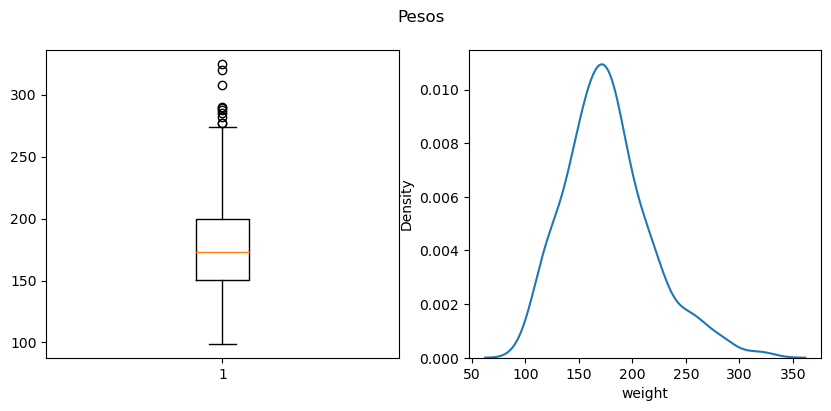

In [4]:
fig, axs = plt.subplots(1,2,figsize=(10,4)) 
fig.suptitle('Pesos')

axs[0].boxplot(a1['weight'])
#axs[0].set_title('gg')
sns.kdeplot(a1['weight'],ax=axs[1])
#axs[1].set_title('gg')

Text(0.5, 1.0, 'Función de distribución de Peso')

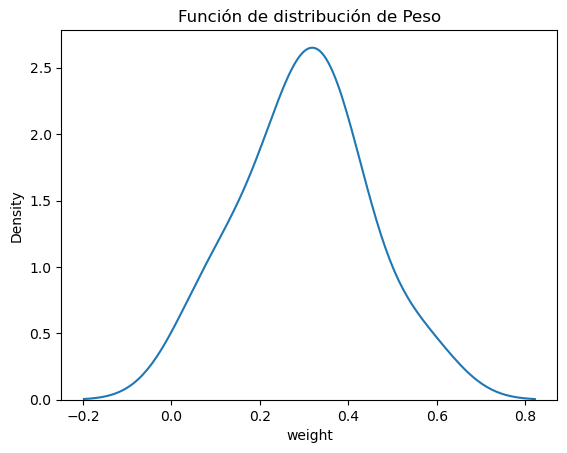

In [5]:
#plt.hist(a0['REF'])
#plt.boxplot(a1['height'])
#plt.hist(a1['height'],bins=6)
pp=norm_min_max(a1[['weight']],0,1)
np.random.seed(45)
d_sw=pp['weight'].sample(10)
#d_sw=a1['height'].sample(10)
sns.kdeplot(d_sw)
plt.title('Función de distribución de Peso')

# Pruebas de Normalidad

Plantean hipótesis nula que una muestra proviene de una normal, mediante un porcentaje de probabilidad

## Shapiro-Wilk Test
### Prueba si una muestra de datos tiene una distribución Gaussiana

La prueba de [Shapiro-Wilk](https://statologos.com/prueba-de-shapiro-wilk/) es una forma de saber si una muestra aleatoria proviene de una distribución normal . La prueba te da un valor W; los valores pequeños indican que su muestra no tiene una distribución normal (puede rechazar la hipótesis nula de que su población tiene una distribución normal si sus valores están por debajo de cierto umbral). La fórmula para el valor de W es: 

$$W=\frac{(\sum_{i=1}^{m}a_ix_{(i)})^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$$

donde:
* $n$ es la longitud de los datos
* $m=\frac{n}{2}$ si la longitud es par y $m=\frac{n-1}{2}$ si es impar
* $x_i$ son los valores de muestra aleatorios ordenados
* $a_i$ son las constantes generadas a partir de las covarianzas varianzas y medias de la muestra (tamaño n) de una muestra normalmente distribuida. Obteniendolo a partir de [constantes](https://real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/shapiro-wilk-test/) y utilizando la [tabla de pesos para](https://real-statistics.com/statistics-tables/shapiro-wilk-table/) $n$ valores

* $x_{(i)}=x_{n-i+1}-x_{i}$, lo que significa la diferencia entre cada extremo de los datos ordenados 

Por lo que se puede formalizar que

$$\begin{matrix}
    H_0:\text{La distribución es normal} \\
    H_1: \text{La distribucion no es normal}
\end{matrix}$$

Esto implica que 

$$\begin{matrix} 
    H_0:X \backsim \mathcal{N}(\mu,\sigma^2) \\
    H_1:X \nsim \mathcal{N}(\mu,\sigma^2)
\end{matrix}$$


In [6]:
from scipy.stats import shapiro
data_s_w=d_sw#np.random.normal(0,10,4)#d_sw# np.random.uniform(0,1,52)#
stat, p = shapiro(data_s_w)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente Gaussiana')
else:
 print('Probablemente no Gaussiana')

stat=0.970, p=0.891
Probablemente Gaussiana


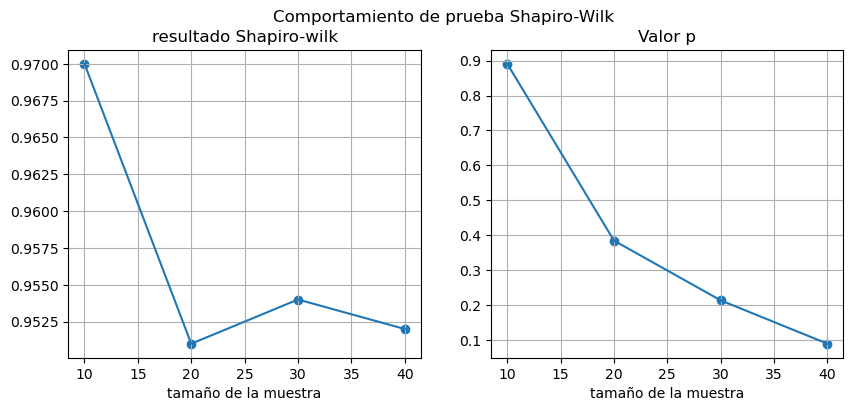

In [7]:
fig, axs = plt.subplots(1,2,figsize=(10,4)) 
fig.suptitle('Comportamiento de prueba Shapiro-Wilk')
# Resultados
a=[0.970,0.951,0.954,0.952]
b=[0.891,0.385,0.214,0.09]
c=[10,20,30,40]
axs[0].plot(c,a)
axs[0].scatter(c,a)
axs[0].set_title('resultado Shapiro-wilk')
axs[0].set_xlabel('tamaño de la muestra')
axs[0].grid()
axs[1].plot(c,b)
axs[1].scatter(c,b)
axs[1].set_title('Valor p')
axs[1].set_xlabel('tamaño de la muestra')
axs[1].grid()

## Prueba de D'Agostino´s
### Prueba si una muestra de datos tiene una distribución Gaussiana

In [8]:
# Example of the D'Agostino's K^2 Normality Test
np.random.seed(45)
d_sw=a1['weight'].sample(40)

#pp=norm_min_max(a1[['weight']],0,1)
#np.random.seed(45)
#d_sw=pp['weight'].sample(30)

from scipy.stats import normaltest
data = d_sw
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente Gaussiana')
else:
 print('Probablemente no Gaussiana')

stat=2.631, p=0.268
Probablemente Gaussiana


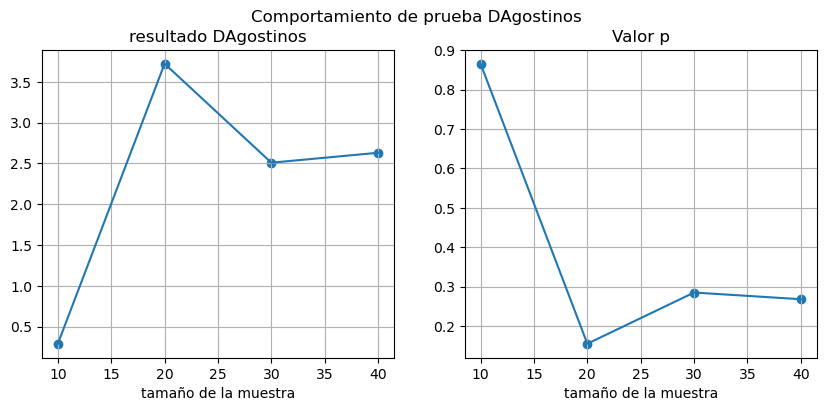

In [9]:
fig, axs = plt.subplots(1,2,figsize=(10,4)) 
fig.suptitle('Comportamiento de prueba DAgostinos')
# Resultados
a=[0.289,
3.723,
2.509,
2.631]
b=[0.866,
0.155,
0.285,
0.268
]
c=[10,20,30,40]
axs[0].plot(c,a)
axs[0].scatter(c,a)
axs[0].set_title('resultado DAgostinos')
axs[0].set_xlabel('tamaño de la muestra')
axs[0].grid()
axs[1].plot(c,b)
axs[1].scatter(c,b)
axs[1].set_title('Valor p')
axs[1].set_xlabel('tamaño de la muestra')
axs[1].grid()

## Prueba de Anderson-Darling
### Prueba si una muestra de datos tiene una distribución Gaussiana

In [10]:
from scipy.stats import anderson
#np.random.seed(45)
#d_sw=a1['weight'].sample(40)

pp=norm_min_max(a1[['weight']],0,1)
np.random.seed(45)
d_sw=pp['weight']#.sample(40)


result = anderson(d_sw,dist='gumbel') # ‘norm’, ‘expon’, ‘logistic’, ‘gumbel’
print('Resultado estadistico= ',result.statistic)
for a in range(len(result.critical_values)):
    sv,cv=result.significance_level[a], result.critical_values[a]
    if result.statistic <cv:
        print(cv,'>',result.statistic,'No se puede rechazar la hipótesis nula de ',result.significance_level[a],'%')
    else:
        print(cv,'Se rechaza la hipótesis nula *****')
print(result.critical_values)

Resultado estadistico=  15.693702019429224
0.469 Se rechaza la hipótesis nula *****
0.631 Se rechaza la hipótesis nula *****
0.749 Se rechaza la hipótesis nula *****
0.868 Se rechaza la hipótesis nula *****
1.028 Se rechaza la hipótesis nula *****
[0.469 0.631 0.749 0.868 1.028]


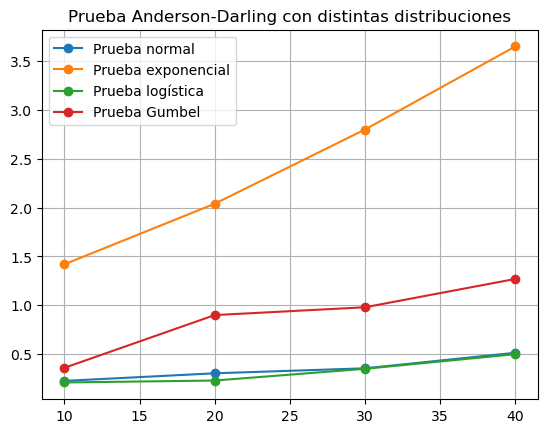

In [11]:
m=[10,20,30,40]
p_n=[0.226,0.304,0.355,0.514]
p_e=[1.42,2.04,2.8,3.65]
p_log=[0.21,0.23,0.35,0.5]
p_gum=[0.36,0.9,0.98,1.27]
plt.plot(m,p_n,linestyle='-', marker='o')
plt.plot(m,p_e,linestyle='-', marker='o')
plt.plot(m,p_log,linestyle='-', marker='o')
plt.plot(m,p_gum,linestyle='-', marker='o')
plt.legend(['Prueba normal', 'Prueba exponencial', 'Prueba logística','Prueba Gumbel'])
plt.title('Prueba Anderson-Darling con distintas distribuciones')
plt.grid()

# Datos para pruebas de correlación continuas

In [12]:
## Base de datos
house=pd.read_csv('house_reg.csv')
print(house.shape)
print(house.columns)
print(house.describe())

(102, 3)
Index(['Unnamed: 0', 'price', 'sqft_lot'], dtype='object')
       Unnamed: 0          price      sqft_lot
count  102.000000     102.000000    102.000000
mean   207.568627  490029.394608   7753.401961
std    117.669659   95553.547161   1591.286908
min      4.000000  332000.000000   5150.000000
25%    108.750000  417000.000000   6380.000000
50%    218.000000  490000.000000   7674.000000
75%    300.750000  561875.000000   8992.500000
max    399.000000  681716.000000  11172.000000


<AxesSubplot:xlabel='price', ylabel='Density'>

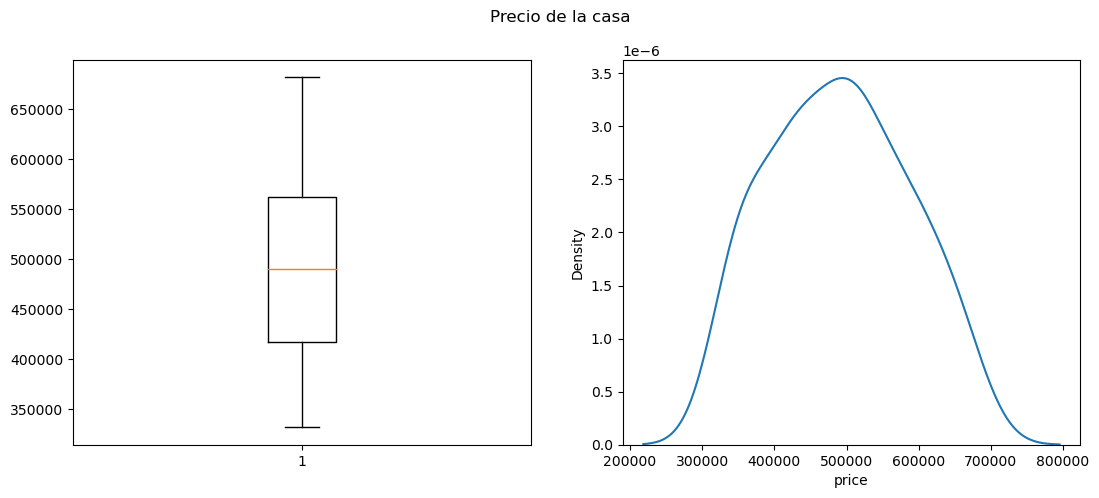

In [13]:
fig, axs = plt.subplots(1,2,figsize=(13,5)) 
fig.suptitle('Precio de la casa')

axs[0].boxplot(house['price'])
#axs[0].set_title('gg')
sns.kdeplot(house['price'],ax=axs[1])
#axs[1].set_title('gg')



<AxesSubplot:xlabel='sqft_lot', ylabel='Density'>

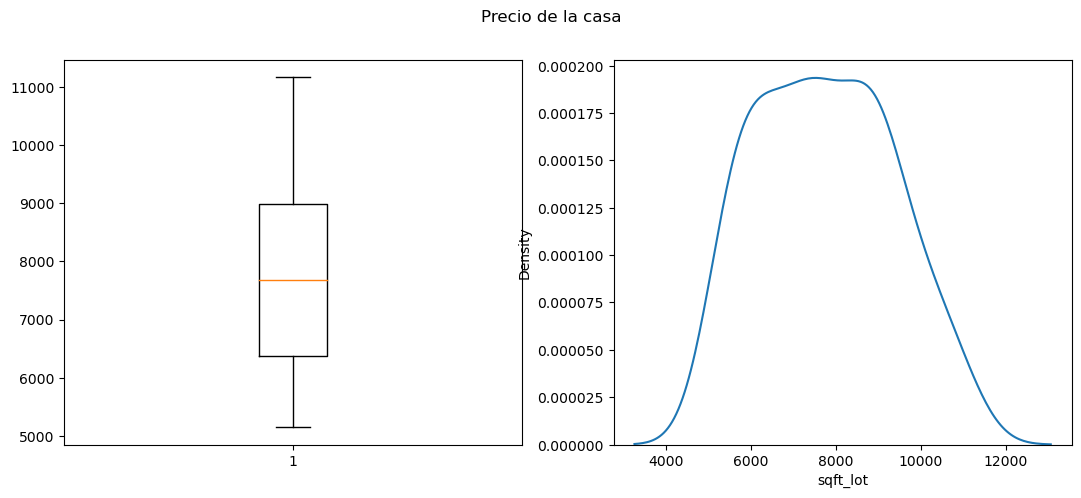

In [14]:
fig, axs = plt.subplots(1,2,figsize=(13,5)) 
fig.suptitle('Precio de la casa')

axs[0].boxplot(house['sqft_lot'])
#axs[0].set_title('gg')
sns.kdeplot(house['sqft_lot'],ax=axs[1])
#axs[1].set_title('gg')


Text(0.5, 1.0, 'Diagrama de dispersion de precio y area de casas')

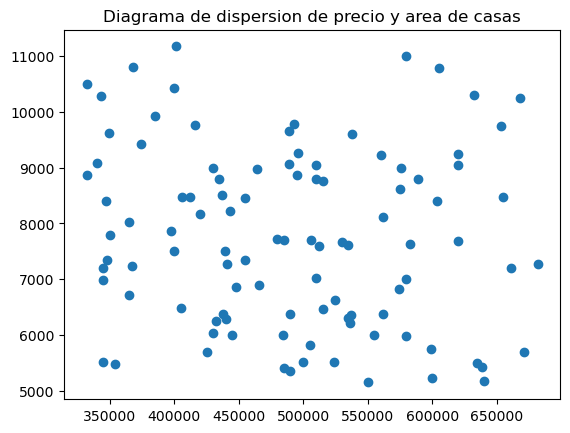

In [15]:
plt.scatter(house['price'],house['sqft_lot'])
plt.title('Diagrama de dispersion de precio y area de casas')

## Prueba de Correlación de Pearson
### Prueba si dos muestras tienen una relación lineal.

In [16]:
from scipy.stats import pearsonr
data1 = house['price']
data2 = house['sqft_lot']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente independiente')
else:
 print('Probablemente dependiente')

stat=-0.124, p=0.214
Probablemente independiente


### Correlación de rango de Spearman

In [17]:
from scipy.stats import spearmanr
data1 = house['price']
data2 = house['sqft_lot']
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independiente')
else:
	print('Probablemente dependiente')

stat=-0.139, p=0.164
Probablemente independiente


### Correlación de rangos de Kendall


In [18]:
f_rt=pd.read_csv('Food_rating.csv')


Text(0.5, 0, 'Estrellas')

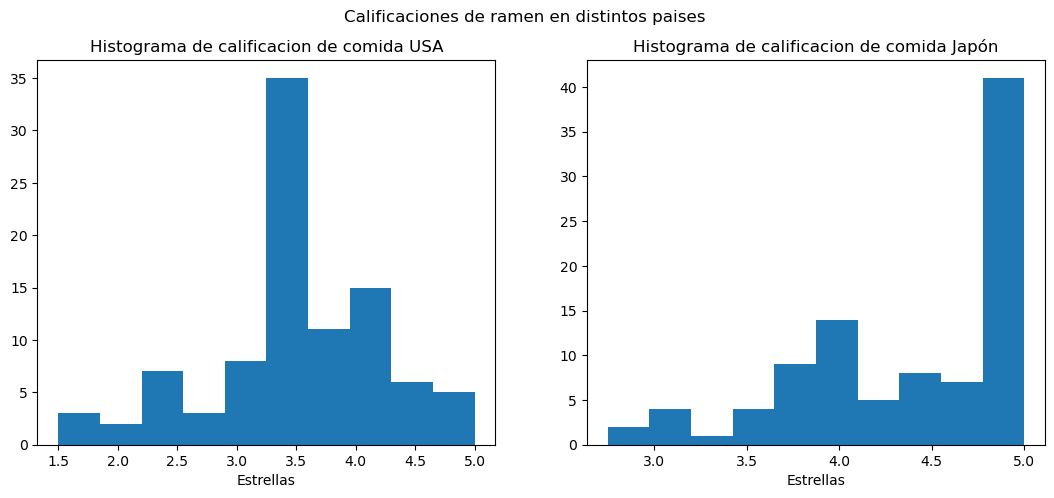

In [19]:
fig, axs = plt.subplots(1,2,figsize=(13,5)) 
fig.suptitle('Calificaciones de ramen en distintos paises')

axs[0].hist(f_rt['usa'],bins=10)
axs[0].set_title('Histograma de calificacion de comida USA')
axs[0].set_xlabel('Estrellas')
axs[1].hist(f_rt['japan'],bins=10)
axs[1].set_title('Histograma de calificacion de comida Japón')
axs[1].set_xlabel('Estrellas')

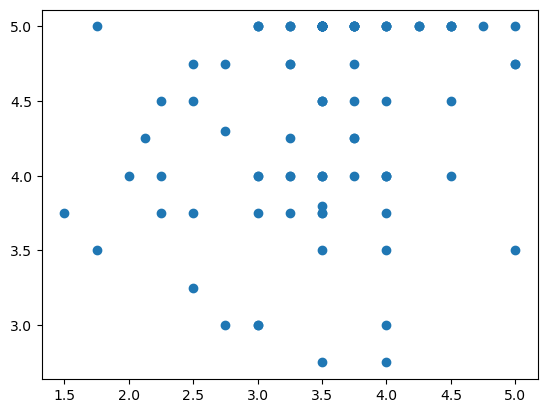

In [20]:
plt.scatter(f_rt['usa'],f_rt['japan'])

In [21]:
from scipy.stats import kendalltau
data1 = f_rt['usa']
data2 = f_rt['japan']
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independiente')
else:
	print('Probablemente dependiente')

stat=0.202, p=0.011
Probablemente dependiente


### Prueba Chi-Cuadrado

In [22]:
from scipy.stats import chi2_contingency
tabla_contingencia=pd.crosstab(f_rt['japan'],f_rt['usa'])
stat, p, dof, expected = chi2_contingency(tabla_contingencia)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente independiente')
else:
    print('Probablemente dependiente')
    


stat=193.094, p=0.066
Probablemente independiente


## Base de datos para series de tiempo

Se utilizará una base de datos de la temperatura de manaos en Brasil. Por año y mes

Text(0.5, 0, 'Año')

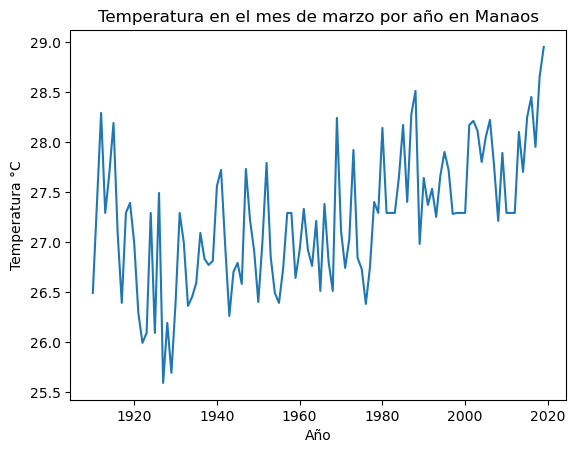

In [23]:
d_br=pd.read_csv('manaos_temp.csv')

plt.plot(d_br['YEAR'].to_numpy(),d_br['MAR'].to_numpy())
plt.title('Temperatura en el mes de marzo por año en Manaos')
plt.ylabel('Temperatura °C')
plt.xlabel('Año')

## Pruebas de Estacionalidad

### Prueba de raíz unitaria aumentada Dickey-Fuller

In [24]:
from statsmodels.tsa.stattools import adfuller

data = d_br['MAR']


tt=adfuller(data)
tt

(-1.315104592720674,
 0.6222339255791948,
 4,
 105,
 {'1%': -3.4942202045135513,
  '5%': -2.889485291005291,
  '10%': -2.5816762131519275},
 154.93783642046546)

### Prueba de Kwiatkowski-Phillips-Schmidt-Shin

In [25]:
from statsmodels.tsa.stattools import kpss
data = d_br['MAR']
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente estacionaria')
else:
 print('Probablemente no estacionaria')

stat=1.253, p=0.010
Probablemente no estacionaria


C:\Users\aldoa\anaconda3\envs\env2\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## Base de datos para pruebas parámetricas

In [26]:
dq=pd.read_csv('data_inmersion2.csv')

{'whiskers': [<matplotlib.lines.Line2D at 0x26127efa9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x26127efae20>,
 'boxes': [<matplotlib.lines.Line2D at 0x26127efa6d0>,
 'medians': [<matplotlib.lines.Line2D at 0x26127f09400>,
 'fliers': [<matplotlib.lines.Line2D at 0x26127f096d0>,
 'means': []}

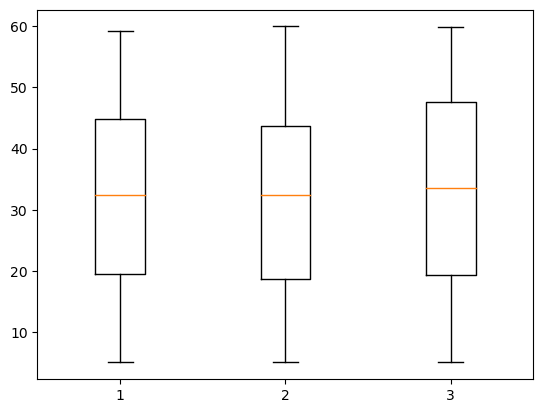

In [27]:
plt.boxplot(dq)

Index(['Male', 'Female', 'Other'], dtype='object')


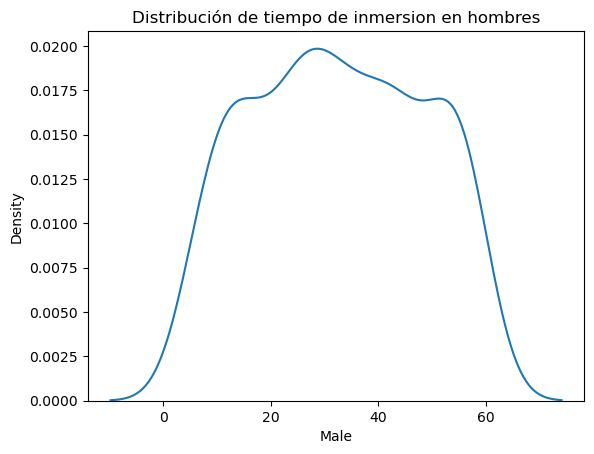

In [28]:
sns.kdeplot(dq['Male'])
plt.title('Distribución de tiempo de inmersion en hombres')
print(dq.columns)

Text(0.5, 1.0, 'Distribución de tiempo de inmersion en mujeres')

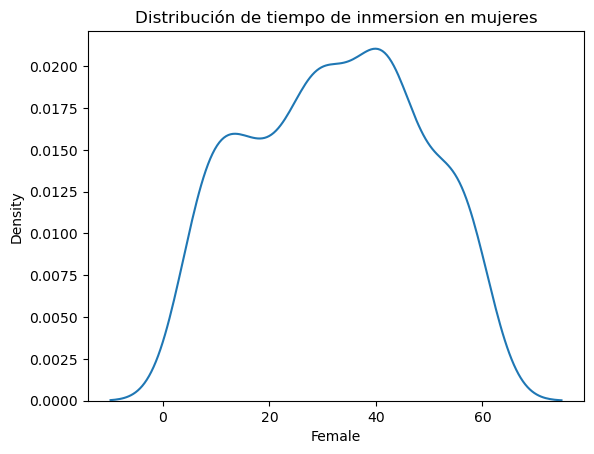

In [29]:
sns.kdeplot(dq['Female'])
plt.title('Distribución de tiempo de inmersion en mujeres')

Text(0.5, 1.0, 'Distribución de tiempo de inmersion en otros')

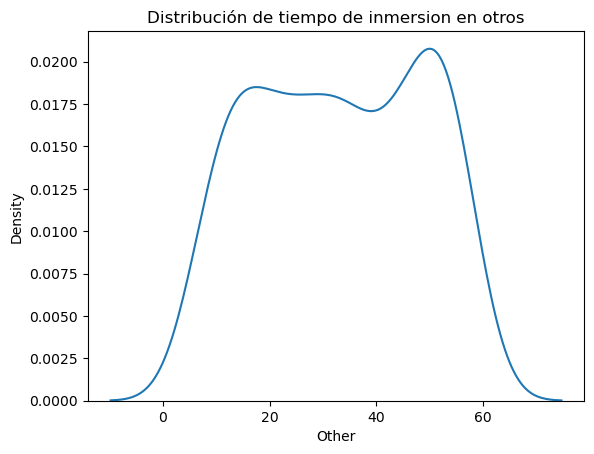

In [30]:
sns.kdeplot(dq['Other'])
plt.title('Distribución de tiempo de inmersion en otros')

## Pruebas de hipótesis estadísticas paramétricas
### Prueba t de Student

In [31]:
from scipy.stats import ttest_ind
data1 = dq['Male']
data2 = dq['Female']
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Las medias de las muestras son iguales')
else:
 print('Las medias de las muestras no son iguales')

stat=0.313, p=0.754
Las medias de las muestras son iguales


In [32]:
dq.describe()

,Male,Female,Other
count,325.000000,325.000000,325.000000
mean,32.626522,32.239297,33.098660
std,15.777011,15.738350,15.660991
min,5.095207,5.039439,5.008672
25%,19.481425,18.722275,19.300458
50%,32.331670,32.415662,33.510716
75%,44.772571,43.693336,47.655706
max,59.166574,59.983723,59.857616


### Prueba t de Student emparejada

In [33]:
from scipy.stats import ttest_rel
data1 = dq['Male']
data2 = dq['Female']
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente la misma distribución')
else:
 print('Probablemente diferente distribución')

stat=0.320, p=0.749
Probablemente la misma distribución


### Prueba de Análisis de Varianza (ANOVA)

In [34]:
from scipy.stats import f_oneway
data1 = dq['Male']
data2 = dq['Female']
data3 = dq['Other']
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente la misma distribución')
else:
 print('Probablemente diferente distribución')

stat=0.243, p=0.784
Probablemente la misma distribución


### Prueba de U de Mann-Whitney

In [35]:
from scipy.stats import mannwhitneyu
data1 = dq['Male']
data2 = dq['Female']
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente es la misma distribución')
else:
 print('Probablemente es diferente distribución')

stat=53359.000, p=0.820
Probablemente es la misma distribución


## Base de Datos categoricos para wilcoxon

In [36]:
rr=pd.read_csv('Tratamiento.csv')
rr.columns

Index(['DX4', 'DX5', 'DX6', 'vivos'], dtype='object')

Text(0.5, 0, 'Tratamiento')

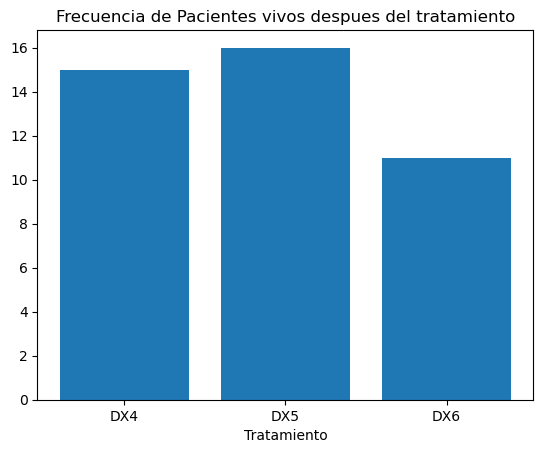

In [37]:
counts=rr.drop('vivos',axis=1).sum()
plt.bar(counts.index,counts.values)
plt.title('Frecuencia de Pacientes vivos despues del tratamiento')
plt.xlabel('Tratamiento')

### Prueba de rangos con signo de Wilcoxon

In [38]:
from scipy.stats import wilcoxon
data1 = rr['vivos']
data2 = rr['DX6']
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente es la misma distribución')
else:
 print('Probablemente es diferente distribución')

stat=0.000, p=0.014
Probablemente es diferente distribución


C:\Users\aldoa\anaconda3\envs\env2\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\aldoa\anaconda3\envs\env2\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


### Prueba H de Kruskal-Wallis

In [39]:
from scipy.stats import kruskal
data1 = rr['vivos']
data2 = rr['DX6']
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente es la misma distribución')
else:
 print('Probablemente es diferente distribución')

stat=7.071, p=0.008
Probablemente es diferente distribución


### Prueba de Friedman

In [40]:
from scipy.stats import friedmanchisquare
data1 = rr['DX4']
data2 = rr['DX5']
data3 = rr['DX6']
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente es la misma distribución')
else:
 print('Probablemente es diferente distribución')

stat=5.250, p=0.072
Probablemente es la misma distribución
